In [23]:
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path("D:/Machine leraningTraining/End-to-End Machine Learning Project") / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
import pandas as pd
import os
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data_(housing_path='D:/Machine leraningTraining/End-to-End Machine Learning Project'):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
def load_housing_data():
    tarball_path = Path("D:/Machine leraningTraining/End-to-End Machine Learning Project/datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("D:/Machine leraningTraining/End-to-End Machine Learning Project/datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="D:/Machine leraningTraining/End-to-End Machine Learning Project/datasets")
    return pd.read_csv(Path("D:/Machine leraningTraining/End-to-End Machine Learning Project/datasets/housing/housing.csv"))
housing = load_housing_data()

In [9]:
print(housing.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


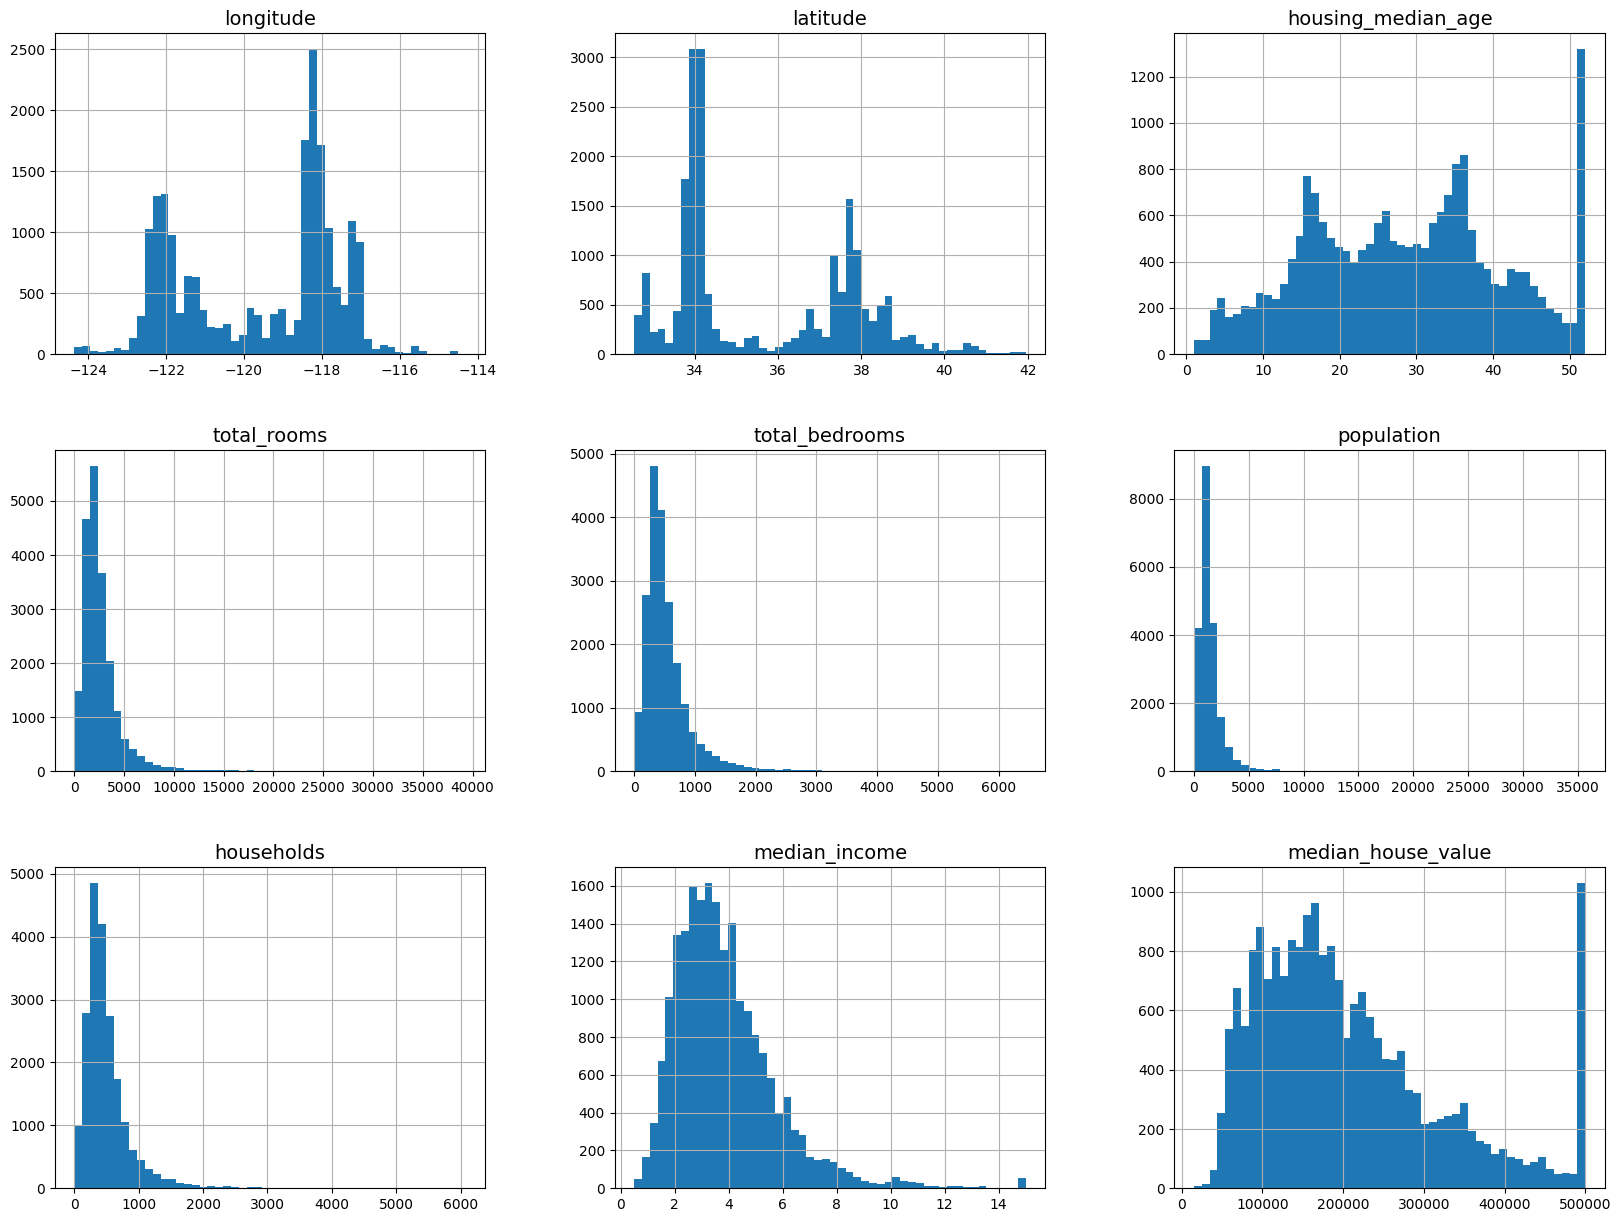

In [43]:
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
housing.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots", tight_layout=True, fig_extension="png", resolution=300)
#save_fig("Copilot_histogram_plots", tight_layout=False, fig_extension="png", resolution=300)
plt.show()

In [14]:
import numpy as np

def split_train_test(data, test_ratio):
    print(f'length data = {len(data)}')
    shuffled_indices = np.random.permutation(len(data))
    print(f'shuffled_indices = {shuffled_indices}')
    test_set_size = int(len(data) * test_ratio)
    print(f'test_set_size = {test_set_size}')
    test_indices = shuffled_indices[:test_set_size]
    print(f'test_indices = {test_indices}')
    train_indices = shuffled_indices[test_set_size:]  
    print(f'train_indices = {train_indices}')
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(housing, 0.2)

length data = 20640
shuffled_indices = [10278 11929 19286 ...  3724 18343 18484]
test_set_size = 4128
test_indices = [10278 11929 19286 ... 15973  6062  1259]
train_indices = [ 1343 16955  1999 ...  3724 18343 18484]


In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

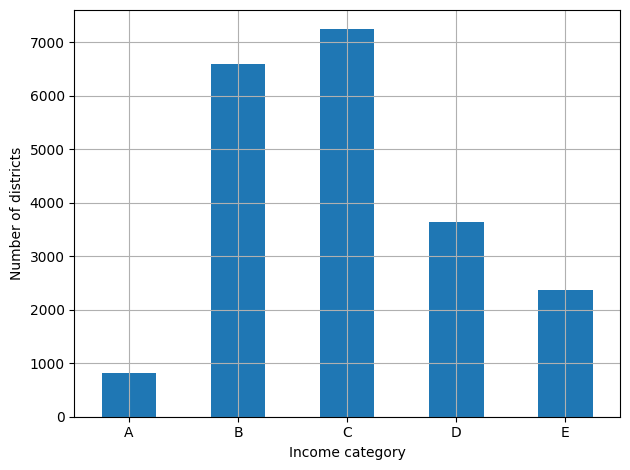

In [26]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=["A", "B", "C", "D", "E"])
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("Income")
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

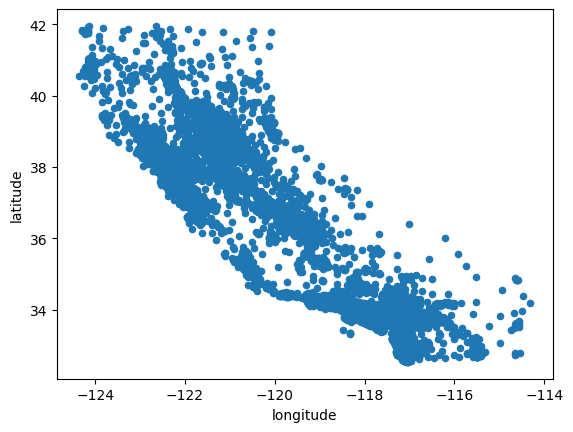

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

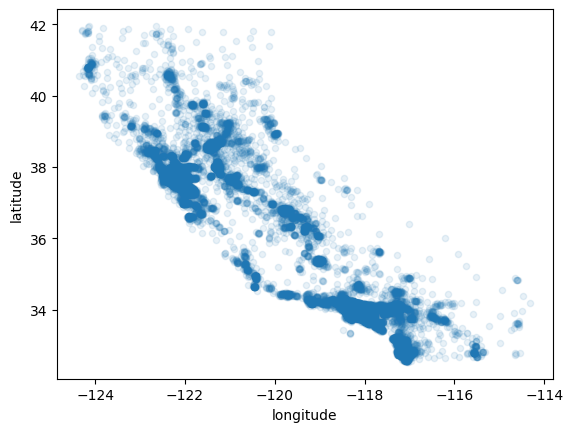

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

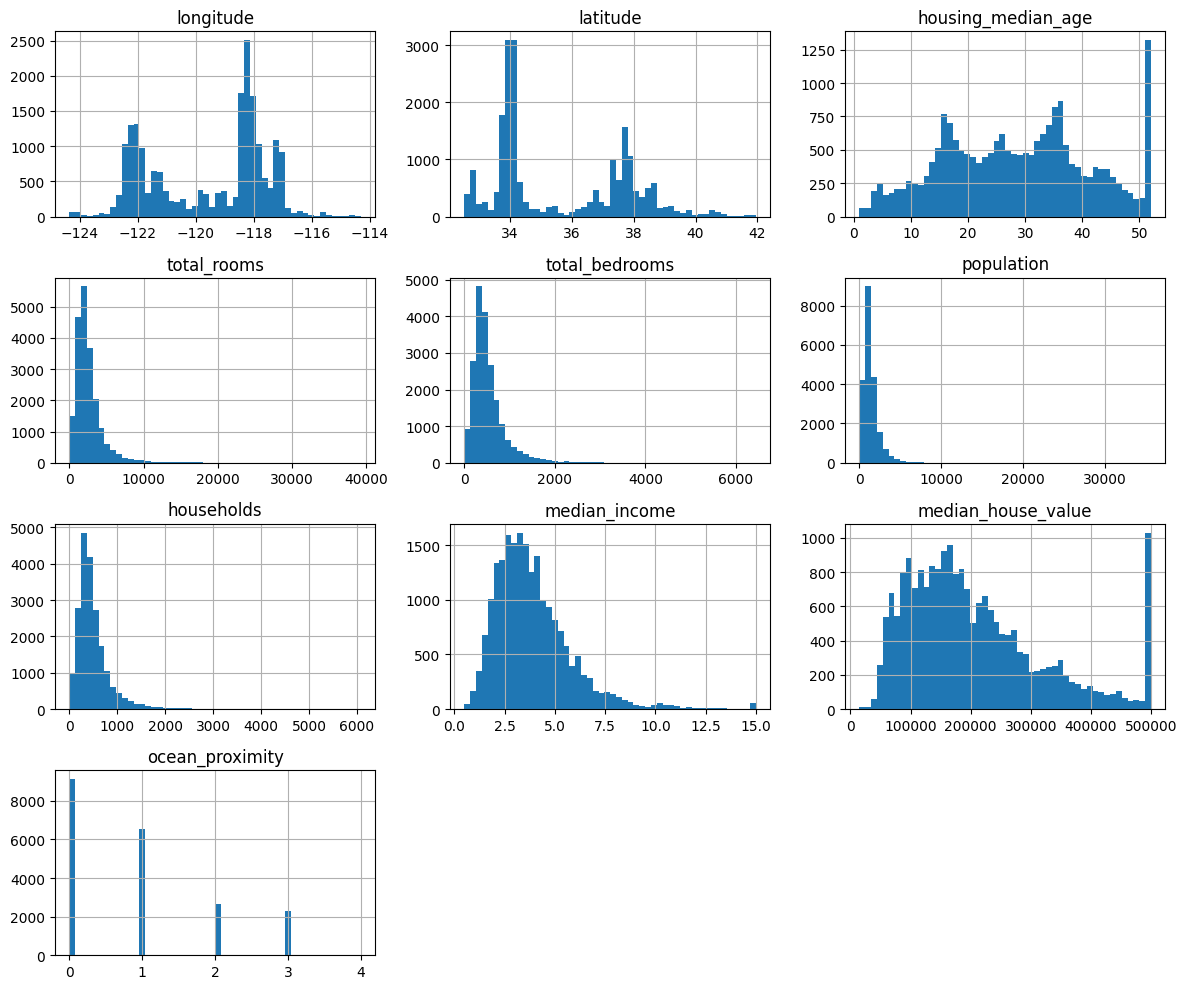

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
housing_copy = housing.copy()
mapping = {
    "<1H OCEAN": 0,
    "INLAND": 1,
    "NEAR OCEAN": 2,
    "NEAR BAY": 3,
    "ISLAND": 4
}

# Apply the mapping
housing_copy['ocean_proximity'] = housing_copy['ocean_proximity'].map(mapping)
housing_copy.hist(figsize=(12, 10), bins=50)  # Adjust bins as needed
save_fig("Ocean_proximity")
plt.show()

In [21]:
import pandas as pd

data=pd.DataFrame({'values': [5,10,15,20,25,30]})
bins = [0,10,20,30]

labels = ['Low', 'Medium', 'High']
data['binned'] = pd.cut(data['values'] , bins=bins)
data['binned_labeled'] = pd.cut(data['values'] , bins=bins,labels=labels)
print(data)
                        

   values    binned binned_labeled
0       5   (0, 10]            Low
1      10   (0, 10]            Low
2      15  (10, 20]         Medium
3      20  (10, 20]         Medium
4      25  (20, 30]           High
5      30  (20, 30]           High


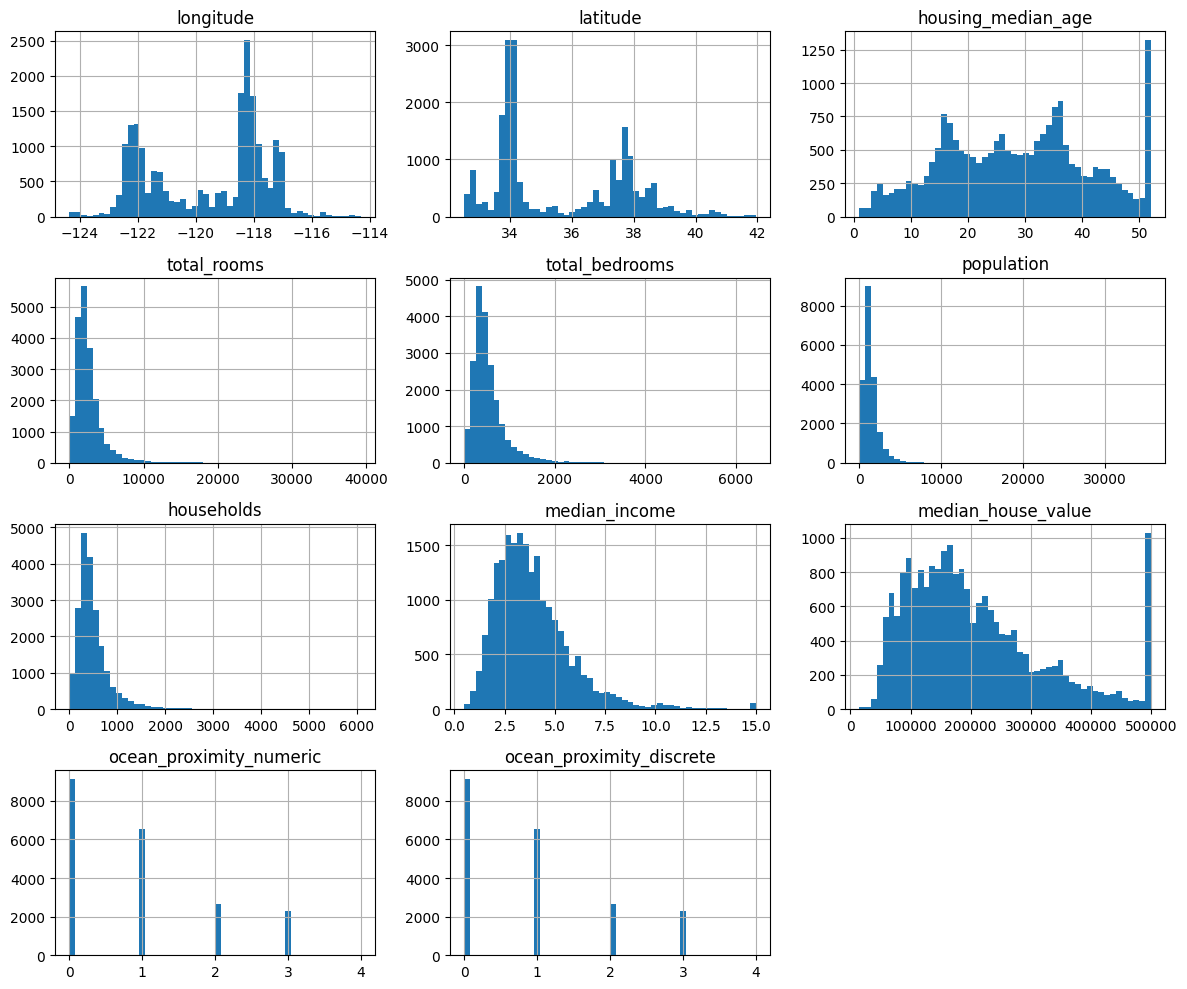

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
housing_copy = housing.copy()

housing_copy['ocean_proximity_numeric'] = housing_copy['ocean_proximity'].map({
    
    "<1H OCEAN": 0,
    "INLAND": 1,
    "NEAR OCEAN": 2,
    "NEAR BAY": 3,
    "ISLAND": 4
})

bins = [-1,0.5,1.5,2.5,3.5,4.5]
labels = [0,1,2,3,4]

housing_copy["ocean_proximity_discrete"] = pd.cut(housing_copy["ocean_proximity_numeric"], bins=bins, labels=labels)
housing_copy["ocean_proximity_discrete"] = housing_copy["ocean_proximity_discrete"].astype(int)

housing_copy.hist(figsize=(12,10),bins=50)
save_fig("Ocean")
plt.show()


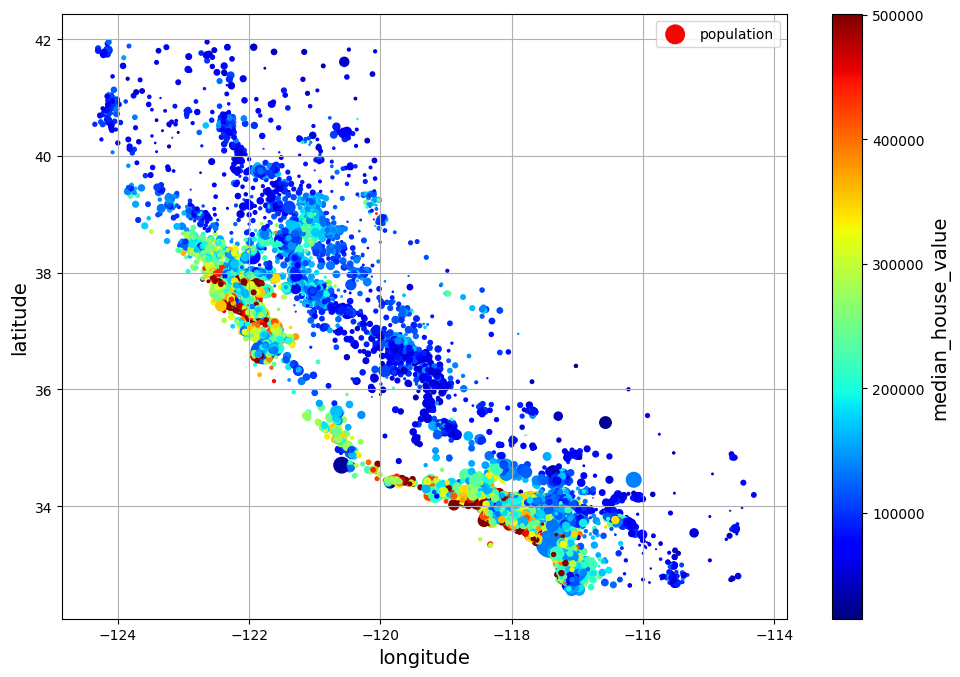

In [49]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

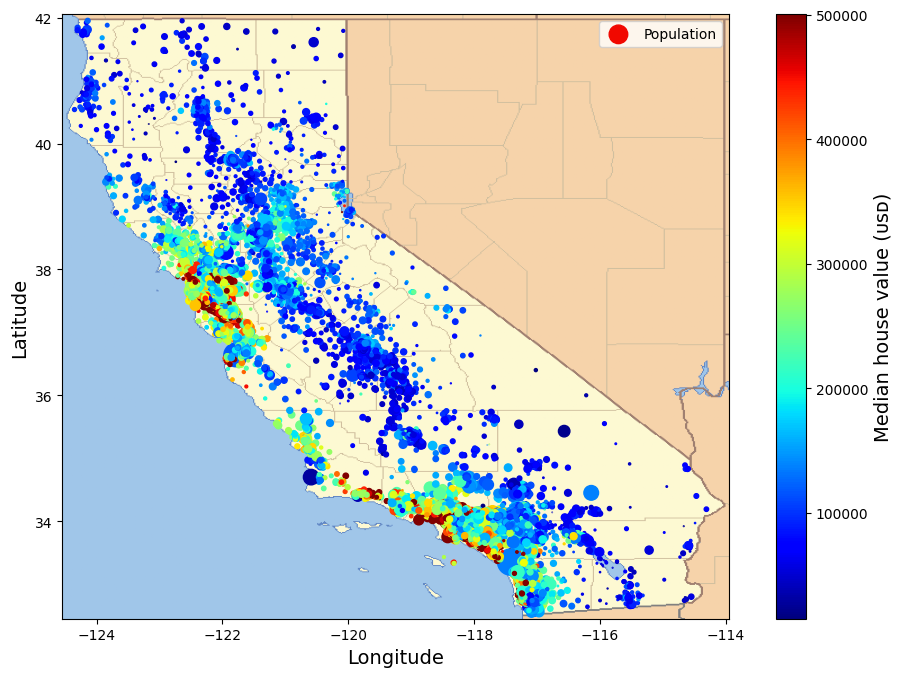

In [50]:
# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

In [56]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)
#print(corr_matrix)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

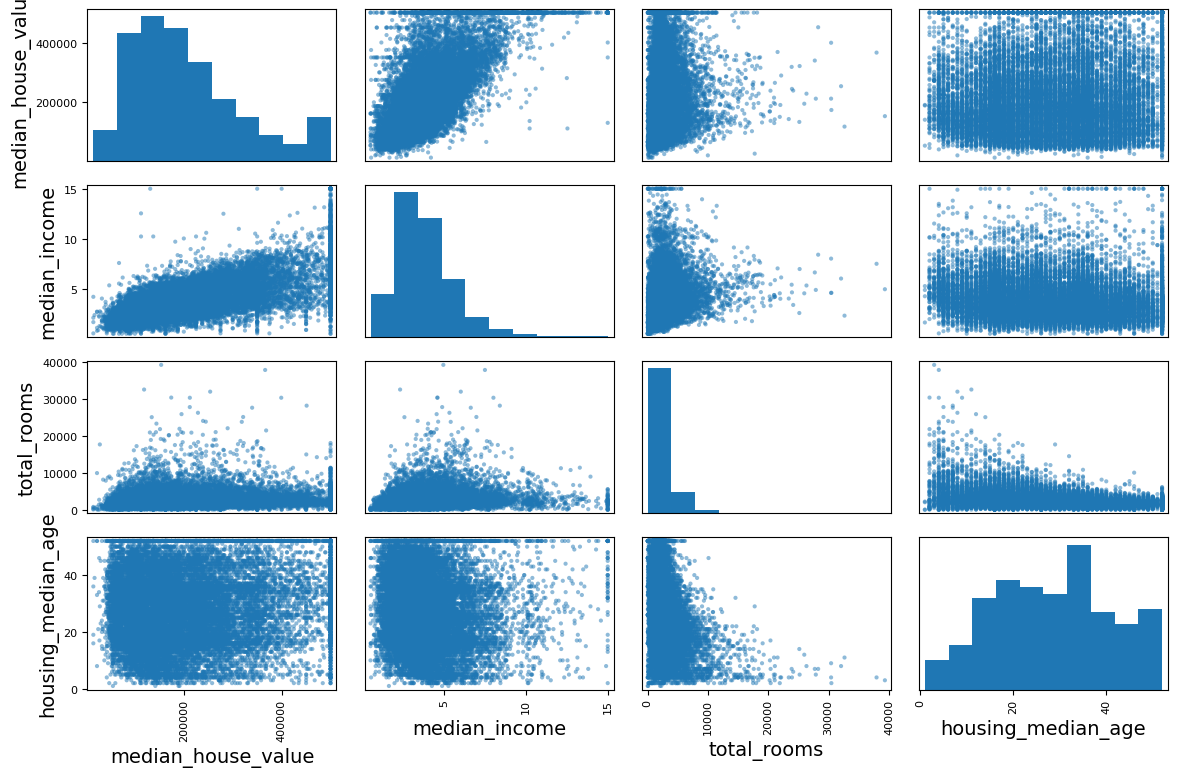

In [57]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

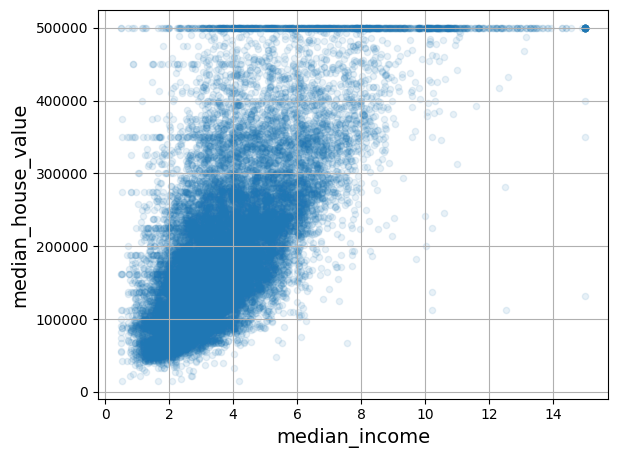

In [58]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()